In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [5]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [3]:
# it's a csv file
df = pd.read_csv('adult.data', names=cols, sep=', ')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [5]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [6]:
df.groupby('sex')["age"].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [7]:
all_countries = sum(df["native-country"].value_counts().values)
print('{:.2%}'.format(df["native-country"].value_counts()['United-States'] / all_countries))

89.59%


# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

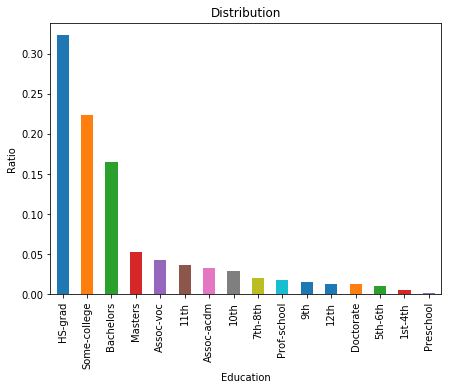

In [8]:
df['education'].value_counts(True).plot(kind='bar', figsize=(7,5), title='Distribution')
plt.xlabel('Education');
plt.ylabel('Ratio');
plt.show()

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [9]:
df.groupby(['marital-status'])['fnlwgt'].aggregate({'mean', 'std'})

,std,mean
marital-status,,
Divorced,105646.789459,185802.790457
Married-AF-spouse,139868.801057,188165.565217
Married-civ-spouse,103097.543011,186763.172877
Married-spouse-absent,114937.598737,193141.760766
Never-married,107765.354649,195383.308996
Separated,117601.326229,206444.325854
Widowed,94005.379316,174159.042296


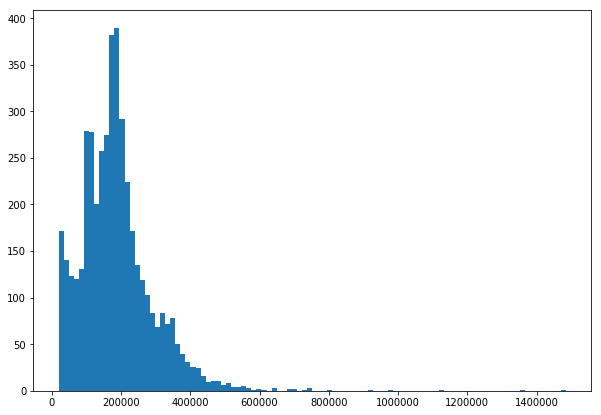

In [10]:
data = df[df['marital-status'] == 'Divorced']['fnlwgt']
plt.figure(figsize=(10,7))
plt.hist(data, bins=100);


> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [11]:
higher_ed = ['Bachelors', 'Doctorate', 'Masters']
res = df.groupby('result')['education'].value_counts(True)

In [12]:
res['>50K']

education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: education, dtype: float64

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [13]:
df.groupby(['education'])['hours-per-week'].aggregate({'mean'})

,mean
education,
10th,37.052519
11th,33.925957
12th,35.780600
1st-4th,38.255952
5th-6th,38.897898
7th-8th,39.366873
9th,38.044747
Assoc-acdm,40.504217
Assoc-voc,41.610709


# Кто больше работает в неделю - мужчины или женщины?

In [14]:
res = pd.crosstab(df.education, df.sex, values=df['hours-per-week'], aggfunc='mean')
res

sex,Female,Male
education,,
10th,32.111864,39.336991
11th,29.821759,36.312248
12th,31.791667,37.768166
1st-4th,31.978261,40.622951
5th-6th,36.047619,39.859438
7th-8th,36.200000,40.409465
9th,33.916667,39.651351
Assoc-acdm,37.358670,42.554180
Assoc-voc,37.830000,43.753968


In [21]:
buf = [True if x>0 else False for x in (res.values[:,0]-res.values[:,1])]
for ed, b in zip(list(res.index), buf):
    print('{} - {}'.format(ed, b))

10th - False
11th - False
12th - False
1st-4th - False
5th-6th - False
7th-8th - False
9th - False
Assoc-acdm - False
Assoc-voc - False
Bachelors - False
Doctorate - True
HS-grad - False
Masters - False
Preschool - False
Prof-school - False
Some-college - False


Вывод: мужчины, в основном, работают больше

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [22]:
df.groupby(['relationship'])['hours-per-week'].aggregate({'mean'}).sort_values(by='mean', ascending=False)

,mean
relationship,
Husband,44.120139
Not-in-family,40.595665
Unmarried,39.103018
Other-relative,37.006116
Wife,36.861607
Own-child,33.269337


Больш всего в неделю работает мужкая половина, состоящая в отношениях, однако в большинстве своем много времени работе уделяют люди без отношений

# Из каких стран люди работают farmers/fishers?

In [23]:
df[df['occupation'] == 'Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
Puerto-Rico        5
?                  5
Guatemala          4
Philippines        4
El-Salvador        2
Vietnam            2
Cuba               2
Italy              2
Canada             2
Cambodia           1
England            1
Portugal           1
France             1
Hong               1
Germany            1
Japan              1
Poland             1
Ireland            1
Yugoslavia         1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [24]:
mm = df.describe()['hours-per-week']['max']
print('max = {:.2f} hrs per week'.format(mm))


max = 99.00 hrs per week


In [25]:
print('Total: {}'.format( len(df[df['hours-per-week'] == mm]) ))

Total: 85


In [26]:
print('Result - Number of persons')
df[df['hours-per-week'] == mm]['result'].value_counts()

Result - Number of persons


<=50K    60
>50K     25
Name: result, dtype: int64